In [1]:
#import MNIST DATASET
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'shape of x_train: {x_train.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of x_test: {x_test.shape}')
print(f'shape of y_test: {y_test.shape}')


shape of x_train: (60000, 28, 28)
shape of y_train: (60000,)
shape of x_test: (10000, 28, 28)
shape of y_test: (10000,)


Labels:[5 0 4 ... 5 6 8]
shape of single digit is (28, 28)
this is digit: 1


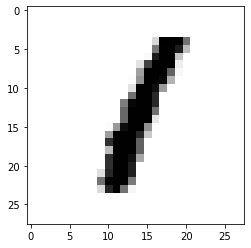

In [18]:
#Display the Digits
from IPython.display import display
import pandas as pd

print(f"Labels:{y_train}")

#single MNIST digit
single = x_train[0]
print(f'shape of single digit is {single.shape}')

#display(pd.DataFrame(single))
#display(single)

#display it as image

#from PIL import Image
#import numpy as np
#img = Image.fromarray(single)
#img

import matplotlib.pyplot as plt
import numpy as np
digit = 105
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f'this is digit: {y_train[digit]}')

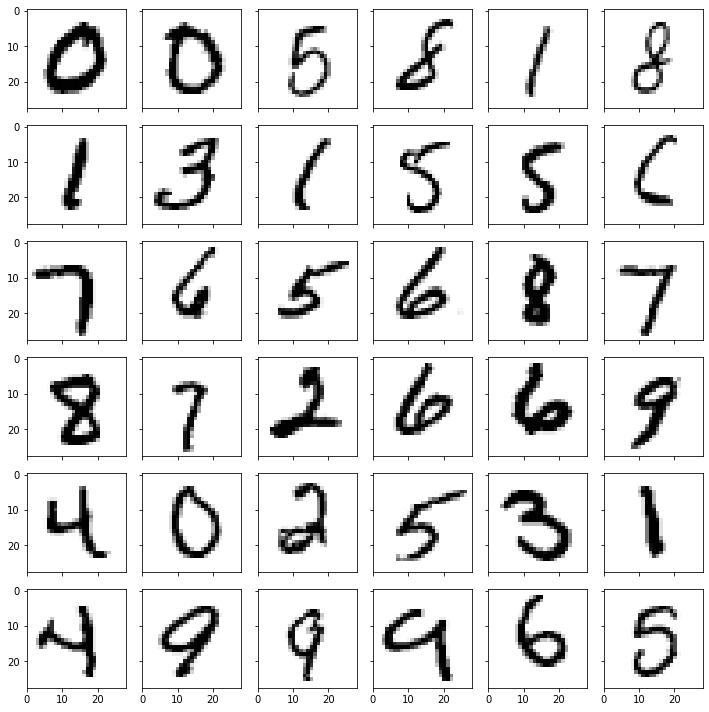

In [41]:
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

#plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(10,10),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

In [4]:
                ########################
                ### CNN FOR MNIST!!! ###
                ########################
# prepare the data
            
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
#input image dim
img_rows, img_cols = 28, 28

                ####################
                ### IMPORTANT!!! ###
                ####################
# this is important while using convultion
# you must specify where is yours deepth of img (numbers of colours)
# and you must do it differently for "different channels"
if K.image_data_format() == 'channels_first': 
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = (x_train-255)/255
x_test = (x_test-255)/255

# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [9]:
# build a model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [10]:
import tensorflow as tf

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
#print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 - 4s - loss: 0.3190 - accuracy: 0.9041 - val_loss: 0.0562 - val_accuracy: 0.9827
Epoch 2/12
60000/60000 - 3s - loss: 0.1027 - accuracy: 0.9696 - val_loss: 0.0425 - val_accuracy: 0.9854
Epoch 3/12
60000/60000 - 3s - loss: 0.0772 - accuracy: 0.9766 - val_loss: 0.0363 - val_accuracy: 0.9874
Epoch 4/12
60000/60000 - 3s - loss: 0.0637 - accuracy: 0.9808 - val_loss: 0.0300 - val_accuracy: 0.9901
Epoch 5/12
60000/60000 - 3s - loss: 0.0505 - accuracy: 0.9846 - val_loss: 0.0303 - val_accuracy: 0.9889
Epoch 6/12
60000/60000 - 3s - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0316 - val_accuracy: 0.9893
Epoch 7/12
60000/60000 - 3s - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0273 - val_accuracy: 0.9915
Epoch 8/12
60000/60000 - 4s - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0273 - val_accuracy: 0.9921
Epoch 9/12
60000/60000 - 3s - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.0267 - val_accuracy: 0.9924
Epoch 10/12
60

In [12]:
from sklearn import metrics
import numpy as np
# For GPU just grab the first 100 images
small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y,axis=1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Accuracy: {}'.format(score))

Accuracy: 1.0


## MNIST FASHION

In [15]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist

# get the data and see what it looks like
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


### Display the Apparel

In [20]:

# Display as text
from IPython.display import display
import pandas as pd

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.set_option('display.max_columns', 24)
pd.set_option('display.max_rows', 20)

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
Labels: [9 0 0 ... 3 0 5]
Shape for single: (28, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0,0,74,189,212,191,175,172,175,181,...,210,210,211,188,188,194,192,216,170,0
24,2,0,0,0,66,200,222,237,239,242,...,182,182,181,176,166,168,99,58,0,0
25,0,0,0,0,0,0,0,40,61,44,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Image (#90): Which is digit '9'


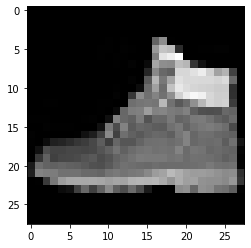

In [17]:

# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 90 # Change to choose new article
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

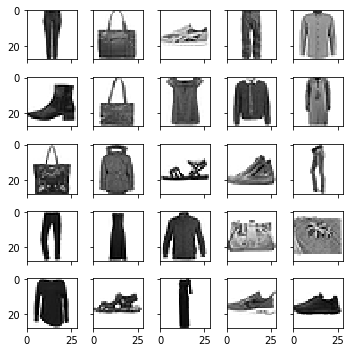

In [26]:
import random

rows = 5
random_probes = random.sample(range(x_train.shape[0]), rows*rows)
sample_images = x_train[random_probes]

fig, axes = plt.subplots(rows, rows,
                         figsize = (rows,rows),
                         sharex=True, sharey=True)

for i in range(rows*rows):
    subplot_row = i//rows
    subplot_col = i%rows
    ax = axes[subplot_row, subplot_col]
    
    plottable_image = np.reshape(sample_images[i],(28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])
    
plt.tight_layout()
plt.show()

In [27]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


In [29]:
import tensorflow as tf
import time



model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 - 21s - loss: 0.1379 - accuracy: 0.9473 - val_loss: 0.2233 - val_accuracy: 0.9261
Epoch 2/12
60000/60000 - 7s - loss: 0.1274 - accuracy: 0.9519 - val_loss: 0.2219 - val_accuracy: 0.9271
Epoch 3/12
60000/60000 - 7s - loss: 0.1243 - accuracy: 0.9529 - val_loss: 0.2286 - val_accuracy: 0.9259
Epoch 4/12
60000/60000 - 7s - loss: 0.1177 - accuracy: 0.9545 - val_loss: 0.2306 - val_accuracy: 0.9290
Epoch 5/12
60000/60000 - 7s - loss: 0.1104 - accuracy: 0.9583 - val_loss: 0.2362 - val_accuracy: 0.9320
Epoch 6/12
60000/60000 - 7s - loss: 0.1032 - accuracy: 0.9603 - val_loss: 0.2530 - val_accuracy: 0.9250
Epoch 7/12
60000/60000 - 7s - loss: 0.1023 - accuracy: 0.9601 - val_loss: 0.2409 - val_accuracy: 0.9298
Epoch 8/12
60000/60000 - 7s - loss: 0.0961 - accuracy: 0.9631 - val_loss: 0.2469 - val_accuracy: 0.9278
Epoch 9/12
60000/60000 - 7s - loss: 0.0947 - accuracy: 0.9636 - val_loss: 0.2625 - val_accuracy: 0.9280
Epoch 10/12
6